# Plot graphs

1. Use matplotlib and seaborn
2. Different types of graphs


# Import necessary packages

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import seaborn as sns
import datetime

# let's import our data and add some columns

In [ ]:
url  = 'https://github.com/ogunjosam/CARNASRDA_python_training/raw/main/osogbo.csv'

# we select column and set index columns
xx = pd.read_csv(url,index_col='created_at',usecols=[0,2,3,4,7,8],parse_dates=True)
xx['PM1.0_CF1_ug/m3'][xx['PM1.0_CF1_ug/m3'] > 300] = np.nan
xx = xx.resample('H').mean()
xx['Hour'] = xx.index.hour
xx['Day'] = xx.index.day
xx['Month'] = xx.index.month

xx.loc[xx['PM1.0_CF1_ug/m3']<51,'Quality'] = 'Good'
xx.loc[xx['PM1.0_CF1_ug/m3'].between(51,100),'Quality'] = 'Moderate'
xx.loc[xx['PM1.0_CF1_ug/m3'].between(101,150),'Quality'] = 'Unhealthy for sensitive groups'
xx.loc[xx['PM1.0_CF1_ug/m3'].between(151,200),'Quality'] = 'Unhealthy'
xx.loc[xx['PM1.0_CF1_ug/m3'].between(201,300),'Quality'] = 'Very Unhealthy'
xx.loc[xx['PM1.0_CF1_ug/m3']>300,'Quality'] = 'Hazardous'

xx

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,Temperature_F,Humidity_%,Hour,Day,Month,Quality
created_at,,,,,,,,,
2021-01-01 00:00:00+00:00,47.902000,72.259000,82.220000,78.000000,59.166667,0,1,1,Good
2021-01-01 01:00:00+00:00,53.006333,86.183667,110.456667,79.166667,62.433333,1,1,1,Moderate
2021-01-01 02:00:00+00:00,53.058000,88.314667,114.411667,80.366667,62.900000,2,1,1,Moderate
2021-01-01 03:00:00+00:00,51.493667,81.587333,99.405667,80.400000,63.800000,3,1,1,Moderate
2021-01-01 04:00:00+00:00,53.252667,82.738000,97.372333,81.900000,63.833333,4,1,1,Moderate
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00+00:00,50.453103,68.777241,87.038966,87.482759,46.551724,19,31,12,Good
2021-12-31 20:00:00+00:00,59.513333,81.695333,101.067000,85.466667,49.966667,20,31,12,Moderate
2021-12-31 21:00:00+00:00,57.508214,78.576786,97.284643,84.107143,52.428571,21,31,12,Moderate


# Boxplots

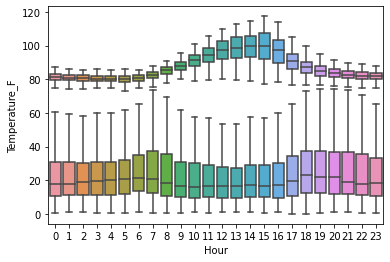

In [ ]:
sns.boxplot(x='Hour',y='PM1.0_CF1_ug/m3',data=xx,showfliers=False)
sns.boxplot(x='Hour',y='Temperature_F',data=xx,showfliers=False)

# Categories of air pollution

In [ ]:
dd = xx['Quality'].value_counts()
dd.columns = ['Label','Values']

f,t = plt.subplots()
plt.pie(dd,labels=dd.index)

Good                              7302
Moderate                           636
Unhealthy for sensitive groups      50
Unhealthy                            5
Very Unhealthy                       5
Name: Quality, dtype: int64

Text(0, 0.5, 'Number of hours')

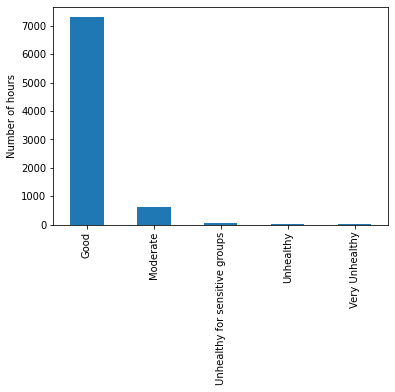

In [ ]:
f,t = plt.subplots()
dd.plot(kind='bar')
t.set_ylabel('Number of hours')

/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  return f(*args, **kwargs)


Text(2022-02-01, 350, 'Hazardous')

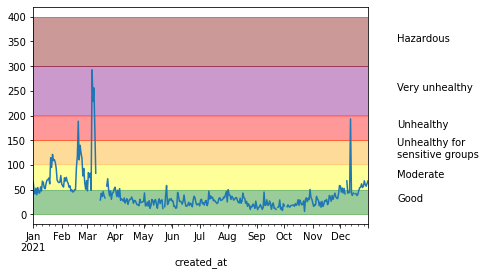

In [ ]:
f,t = plt.subplots()
agg_result = xx.resample('D').max()
agg_result['PM1.0_CF1_ug/m3'].plot()
t.axhspan(ymin=0,ymax=50,alpha=0.4,color='green')
t.text('2022-02-01',25,'Good')
t.axhspan(ymin=51,ymax=100,alpha=0.4,color='yellow')
t.text('2022-02-01',75,'Moderate')
t.axhspan(ymin=101,ymax=150,alpha=0.4,color='orange')
t.text('2022-02-01',115,'Unhealthy for \nsensitive groups')
t.axhspan(ymin=151,ymax=200,alpha=0.4,color='red')
t.text('2022-02-01',175,'Unhealthy')
t.axhspan(ymin=201,ymax=300,alpha=0.4,color='purple')
t.text('2022-02-01',250,'Very unhealthy')
t.axhspan(ymin=301,ymax=400,alpha=0.4,color='maroon')
t.text('2022-02-01',350,'Hazardous')